# Automatidata project 
**Course 4 - The Power of Statistics**

You are a data professional in a data consulting firm, called Automatidata. The current project for their newest client, the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

You receive a new email from Uli King, Automatidata’s project manager. Uli tells your team about a new request from the New York City TLC: to analyze the relationship between fare amount and payment type. A follow-up email from Luana includes your specific assignment: to conduct an A/B test. 

A notebook was structured and prepared to help you in this project. Please complete the following questions.


# Course 4 End-of-course project: Statistical analysis

In this activity, you will practice using statistics to analyze and interpret data. The activity covers fundamental concepts such as descriptive statistics and hypothesis testing. You will explore the data provided and conduct A/B and hypothesis testing.  
<br/>   

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.
  
*This activity has four parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct EDA and hypothesis testing
* How did computing descriptive statistics help you analyze your data? 

* How did you formulate your null hypothesis and alternative hypothesis? 

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your A/B test?

* What business recommendations do you propose based on your results?

<br/> 
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 

# **Conduct an A/B test**


<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.


The purpose of this analysis is to figure out whether customers paying their fare by card pay higher amounts as opposed to those paying by cash.

*Complete the following steps to perform statistical analysis of your data:* 

### Task 1. Imports and data loading

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)

<img src="images/Analyze.png" width="100" height="100" align=left>

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Analyze and Construct**

In this stage, consider the following questions where applicable to complete your code response:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?


- Provide us with a brief overview of our data ie Descriptive statistical summaries like the means, modes etc as well as the general composition of our data.
- It also allows us to take a sneak peak into our features, their composition, distribution etc

### Task 2. Data exploration

Use descriptive statistics to conduct Exploratory Data Analysis (EDA). 

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float

In [5]:
taxi_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [9]:
taxi_data.nunique()

VendorID                     2
tpep_pickup_datetime     22687
tpep_dropoff_datetime    22688
passenger_count              7
trip_distance             1545
RatecodeID                   6
store_and_fwd_flag           2
PULocationID               152
DOLocationID               216
payment_type                 4
fare_amount                185
extra                        6
mta_tax                      3
tip_amount                 742
tolls_amount                38
improvement_surcharge        3
total_amount              1369
dtype: int64

#### Let's look at the distribution of various payment types within our data

[Text(0.5, 1.0, 'Payment_type_distribution')]

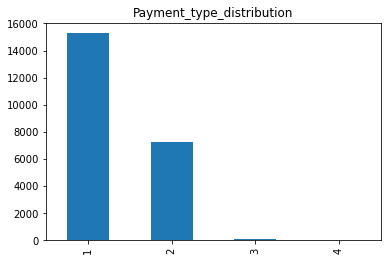

In [24]:
taxi_data['payment_type'].value_counts().plot(kind='bar').set(title='Payment_type_distribution')

- Appears that majority customers pay via credit card.
- Minimal dispute counts are evident within our data. 

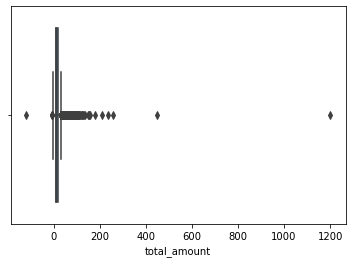

In [15]:
sns.boxplot(x='total_amount',data=taxi_data)

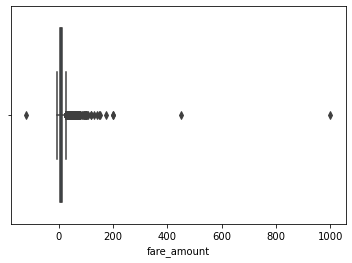

In [16]:
sns.boxplot(x='fare_amount',data=taxi_data)

[Text(0.5, 1.0, 'Passenger Count Ranking')]

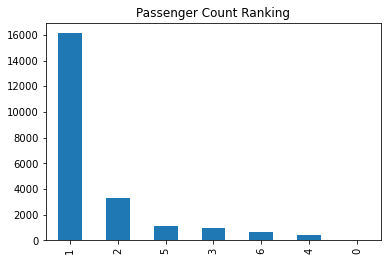

In [22]:
taxi_data['passenger_count'].value_counts().plot(kind='bar').set(title='Passenger Count Ranking')

You are interested in the relationship between payment type and the fare amount the customer pays. One approach is to look at the average fare amount for each payment type. 

In [28]:
taxi_data.groupby(['payment_type'])['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

[Text(0.5, 1.0, 'Average fare amount per payment type')]

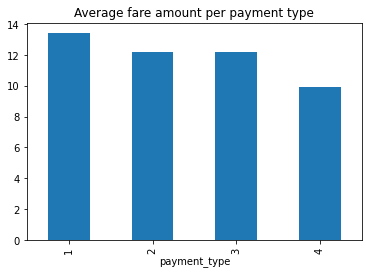

In [27]:
taxi_data.groupby(['payment_type'])['fare_amount'].mean().plot(kind='bar').set(title='Average fare amount per payment type')

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test.


### Task 3. Hypothesis testing

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. Consider your hypotheses for this project as listed below.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.



Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test: 


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 



**Note:** For the purpose of this exercise, your hypothesis test is the main component of your A/B test. 

You choose 5% as the significance level and proceed with a two-sample t-test.

In [29]:
significance_level = 0.05
significance_level

0.05

In [31]:
# Creating separate dataframes for the two groups

credit_card = taxi_data[taxi_data['payment_type'] == 1]
cash = taxi_data[taxi_data['payment_type'] == 2]

In [33]:
# Finding the p_value

test_stat, p_value = stats.ttest_ind(a=credit_card['fare_amount'],b=cash['fare_amount'],equal_var=False)

print(f'Test Statistic : {test_stat}')
print(f'P-Value : {p_value}')

Test Statistic : 6.866800855655372
P-Value : 6.797387473030518e-12


In [34]:
p_value < significance_level

True

- Our p-value is 6.797387473030518e-12.
- This means that there is a 6.797387473030518e-10% chance that the difference between the mean samples of the two groups is 1.216 or greater given the null hypothesis is true ie Occurs by chance.
- The p-value is much smaller than our significance level.
- There is therefore enough evidence to reject the null hypothesis.
- This means that there is enough statistical evidence to state that there is a difference between the fare amounts paid by credit card and by cash.

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4. Communicate insights with stakeholders

*Ask yourself the following questions:*

1. What business insight(s) can you draw from the result of your hypothesis test?
2. Consider why this A/B test project might not be realistic, and what assumptions had to be made for this educational project.

- The standout business insight would be for the company to prioritize payment by credit card as it could lead to more revenue.
- There is a difference between the fare amounts paid by the two groups.
- However, it might be worth conducting further analysis on the customer behaviour among this groups ie Do most credit card holders have longer trips generally etc.
- A further test using more data could also be carried out to further solidify the results of this analysis.
- It's also not clear who decides about the payment method, could be the taxi drivers request a particular payment and the customers have to comply with it.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.